<a href="https://colab.research.google.com/github/mellit100/ramp/blob/main/PBA%202025-26%20calendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

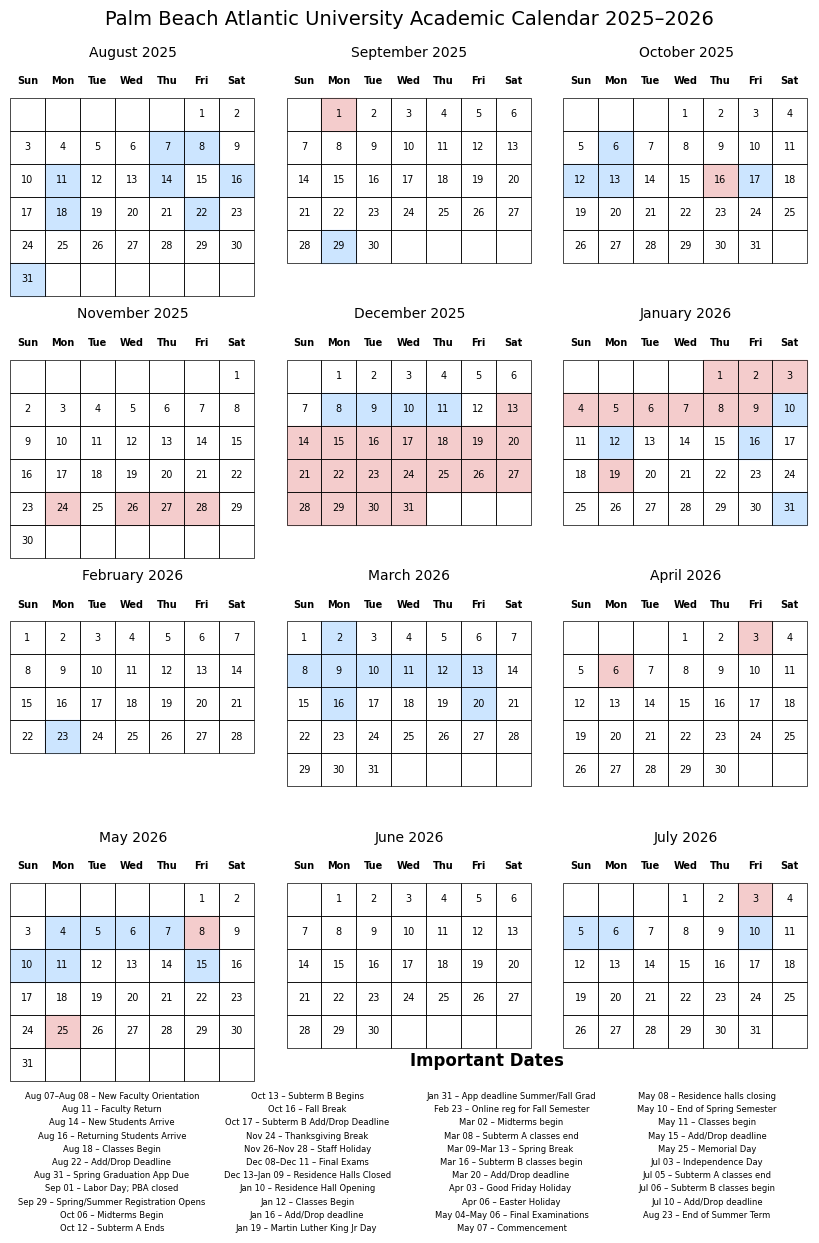

In [7]:
import matplotlib.pyplot as plt
import calendar
from datetime import datetime, timedelta

def add_date_range(events_dict, start_date_str, end_date_str, label, event_type):
    start = datetime.strptime(start_date_str, "%Y-%m-%d")
    end = datetime.strptime(end_date_str, "%Y-%m-%d")
    delta = timedelta(days=1)
    current = start
    while current <= end:
        key = current.strftime("%Y-%m-%d")
        events_dict[key] = (label, event_type)
        current += delta

events = {}

# Add individual events as before
# AUGUST 2025
events["2025-08-07"] = ("New Faculty Orientation", "event")
events["2025-08-08"] = ("New Faculty Orientation", "event")
events["2025-08-11"] = ("Faculty Return", "event")
events["2025-08-14"] = ("New Students Arrive", "event")
events["2025-08-16"] = ("Returning Students Arrive", "event")
events["2025-08-18"] = ("Classes Begin", "event")
events["2025-08-22"] = ("Add/Drop Deadline", "event")
events["2025-08-31"] = ("Spring Graduation App Due", "event")

# SEPTEMBER 2025
events["2025-09-01"] = ("Labor Day; PBA closed", "closed")
events["2025-09-29"] = ("Spring/Summer Registration Opens", "event")

# OCTOBER 2025
events["2025-10-06"] = ("Midterms Begin", "event")
events["2025-10-12"] = ("Subterm A Ends", "event")
events["2025-10-13"] = ("Subterm B Begins", "event")
events["2025-10-16"] = ("Fall Break", "closed")
events["2025-10-17"] = ("Fall Break", "closed")
events["2025-10-17"] = ("Subterm B Add/Drop Deadline", "event")

# NOVEMBER 2025
events["2025-11-24"] = ("Thanksgiving Break", "closed")
events["2025-11-26"] = ("Staff Holiday", "closed")
events["2025-11-27"] = ("Staff Holiday", "closed")
events["2025-11-28"] = ("Staff Holiday", "closed")

# DECEMBER 2025
add_date_range(events, "2025-12-08", "2025-12-11", "Final Exams", "event")
add_date_range(events, "2025-12-13", "2026-01-09", "Residence Halls Closed", "closed")

# JANUARY 2026
events["2026-01-10"] = ("Residence Hall Opening", "event")
events["2026-01-12"] = ("Classes Begin", "event")
events["2026-01-16"] = ("Add/Drop deadline ", "event")
events["2026-01-19"] = ("Martin Luther King Jr Day ", "closed")
events["2026-01-31"] = ("App deadline Summer/Fall Grad", "event")

# FEBRUARY 2026
events["2026-02-23"] = ("Online reg for Fall Semester", "event")

# MARCH 2026
events["2026-03-02"] = ("Midterms begin", "event")
events["2026-03-08"] = ("Subterm A classes end", "event")
add_date_range(events, "2026-03-09", "2026-03-13", "Spring Break ", "event")
events["2026-03-16"] = ("Subterm B classes begin", "event")
events["2026-03-20"] = ("Add/Drop deadline ", "event")

# APRIL 2026
events["2026-04-03"] = ("Good Friday Holiday ", "closed")
events["2026-04-06"] = ("Easter Holiday", "closed")

# MAY 2026
add_date_range(events, "2026-05-04", "2026-05-07", "Final Examinations", "event")
add_date_range(events, "2026-05-07", "2026-05-08", "Commencement", "event")
events["2026-05-08"] = ("Residence halls closing", "closed")
events["2026-05-10"] = ("End of Spring Semester", "event")

# MAY 2026
events["2026-05-11"] = ("Classes begin", "event")
events["2026-05-15"] = ("Add/Drop deadline", "event")
events["2026-05-25"] = ("Memorial Day", "closed")

# JULY 2026
events["2026-07-03"] = ("Independence Day", "closed")
events["2026-07-05"] = ("Subterm A classes end", "event")
events["2026-07-06"] = ("Subterm B classes begin", "event")
events["2026-07-10"] = ("Add/Drop deadline", "event")

# AUGUST 2026
events["2026-08-23"] = ("End of Summer Term", "event")






# Setup
months = list(range(8, 13)) + list(range(1, 8))  # Aug 2025 to Jul 2026
year_map = {m: 2025 if m >= 8 else 2026 for m in months}
month_names = [calendar.month_name[m] for m in months]

# Create figure in portrait layout
fig, axs = plt.subplots(4, 3, figsize=(8.5, 11))  # Portrait: 8.5x11 inches
fig.suptitle("Palm Beach Atlantic University Academic Calendar 2025–2026", fontsize=14)

for idx, month in enumerate(months):
    ax = axs[idx // 3][idx % 3]
    year = year_map[month]
    cal = calendar.Calendar(firstweekday=6)  # Sunday start
    month_days = cal.monthdayscalendar(year, month)

    ax.set_title(f"{calendar.month_name[month]} {year}", fontsize=10)
    ax.set_xlim(0, 7.05)
    ax.set_ylim(-6.05, 1)
    ax.axis('off')

    # Draw weekday headers
    for i, wd in enumerate(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]):
        ax.text(i + 0.5, 0.5, wd, ha='center', va='center', fontsize=7, weight='bold')

    # Draw day boxes
    for row_idx, week in enumerate(month_days):
        for col_idx, day in enumerate(week):
            x = col_idx
            y = -row_idx - 1
            ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='black', linewidth=0.5))
            if day != 0:
                ax.text(x + 0.5, y + 0.5, str(day), ha='center', va='center', fontsize=7)

                date_str = f"{year}-{month:02d}-{day:02d}"
                if date_str in events:
                    _, event_type = events[date_str]
                    color = "#f4cccc" if event_type == "closed" else "#cce5ff"
                    ax.add_patch(plt.Rectangle((x, y), 1, 1, color=color, zorder=0))

      # Adjust layout for portrait readability
      # plt.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.08, hspace=1.2, wspace=0.5)
        plt.subplots_adjust(left=0.03, right=0.97, top=0.93, bottom=0.005, hspace=0.125, wspace=0.125)


# Legend
#
# Step 1: Convert events to sorted list of (date, label, type)
event_list = []
for date_str, (label, event_type) in events.items():
    dt = datetime.strptime(date_str, "%Y-%m-%d")
    event_list.append((dt, label, event_type))
event_list.sort()

# Step 2: Group consecutive dates with same label/type
legend_entries = []
i = 0
while i < len(event_list):
    start_dt, label, event_type = event_list[i]
    end_dt = start_dt
    while (i + 1 < len(event_list) and
           event_list[i + 1][1] == label and
           event_list[i + 1][2] == event_type and
           event_list[i + 1][0] == end_dt + timedelta(days=1)):
        i += 1
        end_dt = event_list[i][0]
    # Format entry
    if start_dt == end_dt:
        legend_text = f"{start_dt.strftime('%b %d')} – {label}"
    else:
        legend_text = f"{start_dt.strftime('%b %d')}–{end_dt.strftime('%b %d')} – {label}"
    legend_entries.append((start_dt, legend_text))
    i += 1

# Step 3: Sort and split into 4 columns
legend_entries.sort(key=lambda x: x[0])
col_count = 4
rows_per_col = (len(legend_entries) + col_count - 1) // col_count
columns = [legend_entries[i*rows_per_col:(i+1)*rows_per_col] for i in range(col_count)]

# Step 4: Print header and legend
fig.text(0.5, 0.02, "Important Dates", ha='left', fontsize=12, weight='bold')
x_positions = [0.15, 0.38, 0.62, 0.85]
for col_idx, col_entries in enumerate(columns):
    y_offset = -0.01
    for _, text in col_entries:
        fig.text(x_positions[col_idx], y_offset, text, ha='center', fontsize=6, color='black')
        y_offset -= 0.012


plt.show()


In [8]:
# Print output - 1 page calendar
from google.colab import files

# Save the figure as a PDF
fig.savefig("academic_calendar.pdf", bbox_inches="tight")

# Download the PDF to your local machine
files.download("academic_calendar.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>